# 機械学習実習 3回課題

In [2]:
#最初にインポートしている前提（教科書 p.11 ）  
## 演習のipynbの最初に次の6行を記載しておきましょう．
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.datasets import load_iris

# cancer後で消す
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
%matplotlib inline

## 課題1

### (1) 教師あり学習と教師なし学習について以下の問に答えよ

#### a) 教師とは何か?

機械学習において、あるモデルを学習させる際、入力値に対する出力値があらかじめ決まったものを訓練データとして用いて、モデルを学習させる。この時の、あらかじめ決まった入力値と出力値のデータセットを教師という。

#### b) 教師あり学習と教師なし学習は何が違うのか，以下の問に答えよ

##### b-1)教師あり学習ができるデータで，教師なし学習はできるか? Yes/No 

- Yes 
- 理由: 教師なし学習は、入力データとなるデータさえあれば実行可能であるため。

##### b-2)教師なし学習ができるデータで，教師あり学習はできるか? Yes/No 

- No
- 理由: 教師あり学習は、入力値のデータと入力値のデータから得られるラベル情報を入力値として必要とする学習方法であるが、教師なし学習で必要な入力値は単なるデータ群だけでよく、教師あり学習に必要な入力値を満たさないから。

##### b-3)以上を踏まえ，教師あり学習と教師なし学習について説明せよ.

- 教師あり学習は、入力データに対して、求められる出力データが予め、ある程度決まっており、入出力が予め分かっている訓練データを用いてモデルを学習させ、訓練データとは違う入力データから出力を予想する学習方法である。
- 一方で、教師なし学習は入力データに対して、求められる出力が特に決まっていなく、与えられた入力データから、似たデータを分類したり、たくさんの特徴量から少量の本質的な特徴量にデータを削減したりする学習方法である。

#### c) 教師あり学習の手法を2つ挙げよ.

- k-近傍法によるクラス分類:学習させた訓練データに対し予測したいデータをプロットし、予測したいデータに近い訓練データをk個求め、k個の訓練データに対するラベルを投票的に決める学習手法
- 線形モデルによる回帰: 訓練データの特徴量を変数とした線形の関数を学習モデルとして作成し、その関数を用いて予測する学習手法

#### d) 教師なし学習の手法を2つ挙げよ.(この問は，第 12 週以降の内容を含む) 

- PCA
a


- k-means クラスタリング
- これは仮

### (2) 3.4.1.1 で用いている cancer データセットを Iris データセットに交換し，PCA による解析実行せよ

#### a) 図 3.4 のようなヒストグラムを描き，コマンドと図をレポートに貼り付けよ.

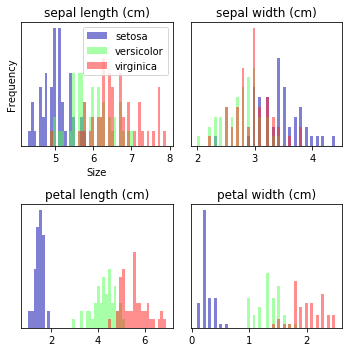

In [6]:
iris_dataset = load_iris()
# irisの特徴量は4つなので、 2*2でちょうどいい
fig, axes = plt.subplots(2, 2, figsize=(5, 5)) 
# irisのクラスは3クラス
setosa = iris_dataset.data[iris_dataset.target == 0] 
versicolor = iris_dataset.data[iris_dataset.target == 1]
virginica = iris_dataset.data[iris_dataset.target == 2]
ax = axes.ravel()

for i in range(4):
    _, bins=np.histogram(iris_dataset.data[:,i],bins=50)
    ax[i].hist(setosa[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(versicolor[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].hist(virginica[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].set_title(iris_dataset.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["setosa", "versicolor","virginica"], loc="best")
fig.tight_layout()

#### b) 以下のコマンドでデータの前処理をしましょう.

In [7]:
# iris_dataset = load_iris()
# from sklearn.preprocessing import StandardScaler 
# scaler =StandardScaler() 
# scaler.fit(iris_dataset.data)
# X_scaled = scaler.transform(iris_dataset.data)

In [8]:
iris_data = load_iris()
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler() 
scaler.fit(iris_data.data)
X_scaled = scaler.transform(iris_data.data)
# 以下、確認用コマンド
# X_scaled

#### c) PCA を実行し，コマンドをレポートに貼り付けよ

In [9]:
from sklearn.decomposition import PCA 
# データの最初の2つの主成分だけ維持する 
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)
# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (150, 4)
Reduced shape: (150, 2)


#### d) PCA の結果を図3−5のように図示し，コマンドと図をレポートに貼り付けよ

Text(0,0.5,'Second principal component')

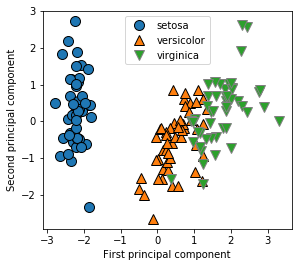

In [10]:
# 第1主成分と第2主成分によるプロット。クラスごとに色分け plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris_data.target)
plt.legend(iris_data.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 課題２

### (1)教師なし学習のうち，PCA と t-SNE の違いは何かを説明せよ

PCAとt-SNEは共に、教師なし学習の次元削減を行う手法である点は共通であるが、主要な用途に違いがある。
PCAは、データセットの多様な特徴量のうちデータを説明する重要な特徴量に削減する事に用いられる。
一方でt-SNEは、高次元の複雑なデータを二次元、三次元に削減した上で可視化する事に用いられる。

### (2) k-means クラスタリングと凝集型クラスタリングの違いは何かを説明せよ


### (3) iris データセットに対して，t-SNE を実行せよ.


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
iris_data = load_iris()

iris_tsne = tsne.fit_transform(iris_dataset.data)

Text(0.5,0,'t-SNE feature 1')

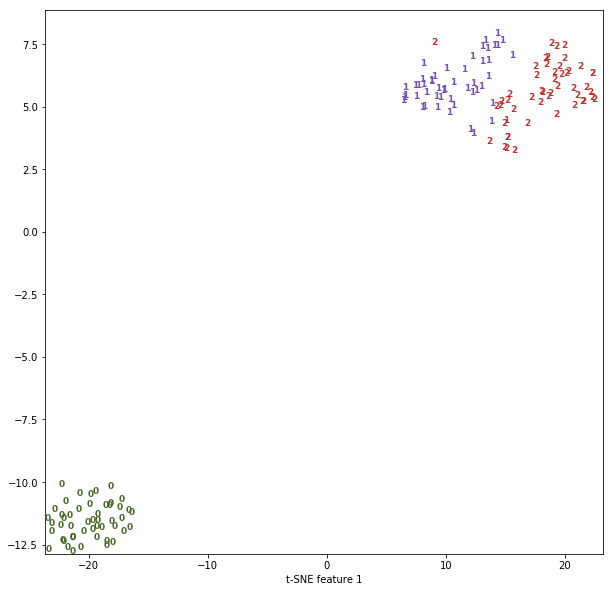

In [21]:
plt.figure(figsize=(10, 10))
plt.xlim(iris_tsne[:, 0].min(), iris_tsne[:, 0].max() + 1)
plt.ylim(iris_tsne[:, 1].min(), iris_tsne[:, 1].max() + 1) 
for i in range(len(iris_dataset.data)):
    # 点ではなく数字をテキストとしてプロットする
    plt.text(iris_tsne[i, 0], iris_tsne[i, 1], str(iris_dataset.target[i]),
             color = colors[iris_dataset.target[i]],
             fontdict={'weight': 'bold', 'size': 9}) 
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
# 0:"setosa" 1:"versicolor" 2:"virginica"

### (4) iris データセットに対して，k-means クラスタリングを実行せよ
	具体的には，p.166 の In47-In50で使われている合成データ(make_blobs)を iris データセットで置き換えて実行せよ.
	その際，図 3-25 に相当する図をレポートに含める事.


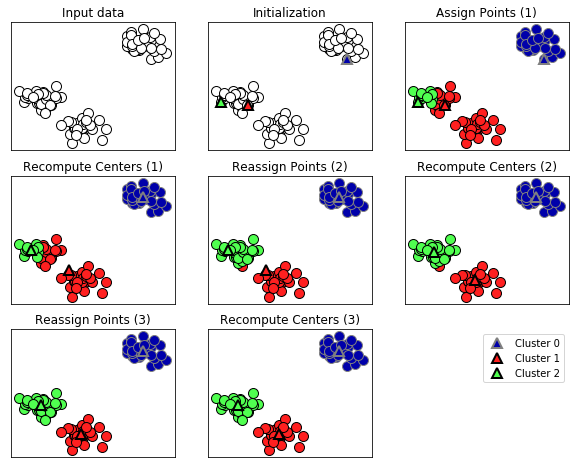

In [22]:
mglearn.plots.plot_kmeans_algorithm()

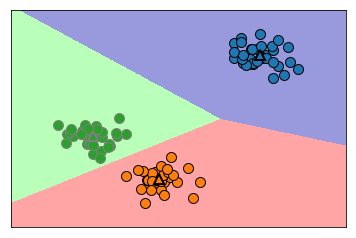

In [23]:
mglearn.plots.plot_kmeans_boundaries()

In [24]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
# 合成2次元データを作る。
X, y = make_blobs(random_state=1)
# クラスタリングモデルを作る 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [26]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


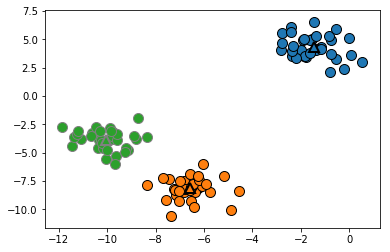

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

## 課題3

### (1) カテゴリ変数とは何かを説明せよ
	説明に際して，教科書の表 4-1 以外の具体的な例を挙げて説明せよ. 


### (2) ワンホットエンコーディング(ダミー変数)とはなにかを説明せよ.
	説明に際しては，

#### a)ワンホットエンコーディングの具体例及び，



#### b)なぜワンホットエンコーディング(ダミー変数)が必要なのかを説明せよ. 

### (3) iris のデータをワンホットエンコーディングせよ.
	課題を簡単にするため，以下のスクリプトを実行した後の iris.df をワンホット エンコーディングせよ.
	なお，どの列(項目)がワンホットエンコーディングされた かを明示すること.


In [6]:
iris = load_iris()
iris.df = pd.DataFrame(iris.data) 
iris.df.columns = iris.feature_names
new_col = iris.target_names[ iris.target ] 
iris.df["target"] = new_col


NameError: name 'load_iris' is not defined

### (4) 交差検証とは何かを説明せよ.
	その際，


#### a)交差検証が必要な理由，


#### b)あるデータの 3-fold cross-validation の行い方
 	なお，b)については「訓練セット」「テストセット」という用語を用いて説明する事

#### c) 交差検証の欠点(デメリット)について含む事.

